# Data Exploration

In [1]:
import pandas as pd
import utils.harry_plotter as harry_plotter
import utils.io as io
import utils.constants as c

Load an exemplary orbit

In [2]:
ORBIT_ID = 42

In [3]:
orbit = pd.read_csv(io.resolve_path(c.DATA_DIR) / c.RAW_SUBDIR / c.ORBIT_FILE(ORBIT_ID),
                    index_col=c.DATE_COL, parse_dates=True)

Peek into the data

In [4]:
orbit.head()

,X_MSO,Y_MSO,Z_MSO,BX_MSO,BY_MSO,BZ_MSO,DBX_MSO,DBY_MSO,DBZ_MSO,RHO_DIPOLE,...,X,Y,Z,VX,VY,VZ,VABS,D,COSALPHA,EXTREMA
DATE,,,,,,,,,,,,,,,,,,,,,
2011-04-13 10:34:22,5994.666,-5966.287,-15414.501,-5.228,3.356,0.500,0.275,0.212,0.158,18008.190777,...,-5.512601e+07,-3.375645e+07,2.300071e+06,15.427609,-39.399943,-4.634681,42.565795,6.468126e+07,-0.815553,2
2011-04-13 10:34:23,5995.121,-5966.539,-15414.238,-5.186,3.293,0.360,0.099,0.186,0.289,18008.193550,...,-5.512601e+07,-3.375645e+07,2.300071e+06,15.427609,-39.399943,-4.634664,42.565793,6.468126e+07,-0.815553,0
2011-04-13 10:34:24,5995.576,-5966.791,-15413.975,-4.887,3.500,1.260,0.164,0.392,0.210,18008.196343,...,-5.512601e+07,-3.375645e+07,2.300071e+06,15.427609,-39.399943,-4.634714,42.565799,6.468126e+07,-0.815553,0
2011-04-13 10:34:25,5996.031,-5967.043,-15413.712,-4.214,4.172,0.611,0.210,0.199,0.377,18008.199153,...,-5.512601e+07,-3.375645e+07,2.300071e+06,15.427609,-39.399943,-4.634736,42.565801,6.468126e+07,-0.815553,0
2011-04-13 10:34:26,5996.486,-5967.295,-15413.449,-4.608,3.046,0.545,0.480,0.667,0.511,18008.201983,...,-5.512601e+07,-3.375645e+07,2.300071e+06,15.427609,-39.399943,-4.634744,42.565802,6.468126e+07,-0.815553,0


In [5]:
orbit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43462 entries, 2011-04-13 10:34:22 to 2011-04-13 22:38:43
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X_MSO         43462 non-null  float64
 1   Y_MSO         43462 non-null  float64
 2   Z_MSO         43462 non-null  float64
 3   BX_MSO        43462 non-null  float64
 4   BY_MSO        43462 non-null  float64
 5   BZ_MSO        43462 non-null  float64
 6   DBX_MSO       43462 non-null  float64
 7   DBY_MSO       43462 non-null  float64
 8   DBZ_MSO       43462 non-null  float64
 9   RHO_DIPOLE    43462 non-null  float64
 10  PHI_DIPOLE    43462 non-null  float64
 11  THETA_DIPOLE  43462 non-null  float64
 12  BABS_DIPOLE   43462 non-null  float64
 13  BX_DIPOLE     43462 non-null  float64
 14  BY_DIPOLE     43462 non-null  float64
 15  BZ_DIPOLE     43462 non-null  float64
 16  RHO           43462 non-null  float64
 17  RXY           43462 non-null  floa

In [6]:
sorted(orbit.EXTREMA.unique())

[-2, -1, 0, 1, 2]

Plot magnetic flux density

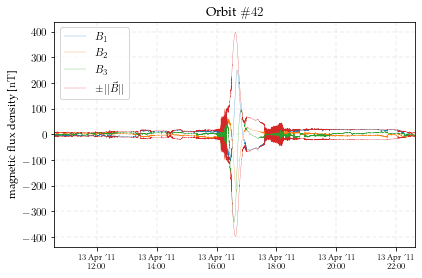

In [7]:
figpath = str(io.resolve_path(c.TEMP_DIR) / c.MESSENGER(ORBIT_ID)) + "_flux.pdf"
harry_plotter.plot_orbit(
    orbit.index,
    (orbit.BX_MSO,
    orbit.BY_MSO,
    orbit.BZ_MSO),
    symbol="B",
    title=f"Orbit $\#{ORBIT_ID}$",
    ylabel="magnetic flux density [\si{nT}]",
    outfile=figpath
)

Plot position of spacecraft

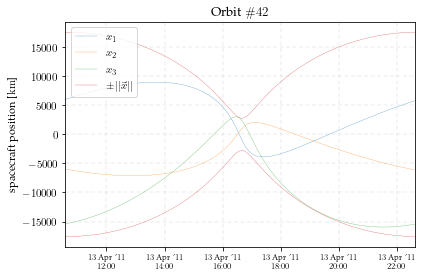

In [8]:
figpath = str(io.resolve_path(c.TEMP_DIR) / c.MESSENGER(ORBIT_ID)) + "_position.pdf"
harry_plotter.plot_orbit(
    orbit.index,
    (orbit.X_MSO,
    orbit.Y_MSO,
    orbit.Z_MSO),
    symbol="x",
    title=f"Orbit $\#{ORBIT_ID}$",
    ylabel="spacecraft position [\si{km}]",
    outfile=figpath
)